In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix,\
 f1_score, recall_score, plot_roc_curve, precision_score, roc_auc_score

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv



In [ ]:
stroke = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv")

**PART 1: LOGISTIC REGRESSION**

In [ ]:
#1)
countMissingData = stroke.isnull().sum()
strokes = stroke.dropna()

train accuracy:  0.960460324659153
train roc/auc:  0.8785481602551567
test accuracy: 0.9602734066516234
test roc/auc:  0.8752030364077512


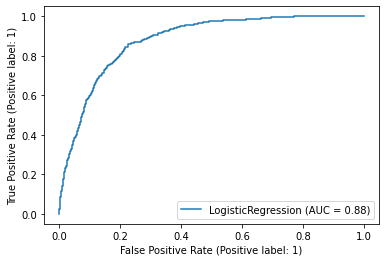

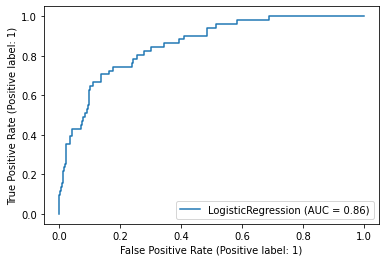

In [ ]:
#2)

#list containing the name of the predictor variables
predictors = ["reg_to_vote", "age", "hypertension", "heart_disease", 
              "ever_married", "Residence_type", "avg_glucose_level", 
              "bmi", "smoking_status_smokes", "smoking_status_formerly", 
              "dog_owner", "income_in_k", "er_visits", 
              "raccoons_to_fight", "fast_food_budget_month"]

#list containing the continuous/interval variables
contin = ["avg_glucose_level", "bmi", "income_in_k", "er_visits", 
          "raccoons_to_fight", "fast_food_budget_month"]

#set X and y 
X = strokes[predictors]
y = strokes["stroke"]

#create k-fold object and logistic regression model
logR = LogisticRegression()
kf = KFold(n_splits = 10)

#create empty lists to store accuracy and roc values for each fold
train_acc = []
test_acc = []
train_roc = []
test_roc = []

#for loop to iterate through each fold and train the model, then calculating accuracy and ROC
for train_indices, test_indices in kf.split(X):
  X_train = X.iloc[train_indices]
  X_test = X.iloc[test_indices]
  y_train = y.iloc[train_indices]
  y_test = y.iloc[test_indices]

  #z-score continuous/interval variables
  z = StandardScaler()
  X_train[contin] = z.fit_transform(X_train[contin])
  X_test[contin] = z.transform(X_test[contin])

  #fit the model
  logR.fit(X_train, y_train)

  #run metrics on training set
  train_acc.append(accuracy_score(y_train, logR.predict(X_train)))
  train_roc.append(roc_auc_score(y_train, logR.predict_proba(X_train)[:,1]))

  #run metrics on test set
  test_acc.append(accuracy_score(y_test, logR.predict(X_test)))
  test_roc.append(roc_auc_score(y_test, logR.predict_proba(X_test)[:,1]))

print("train accuracy: ", np.mean(train_acc))
print("train roc/auc: ", np.mean(train_roc))
print("test accuracy:", np.mean(test_acc)) 
print("test roc/auc: ", np.mean(test_roc))

plot_roc_curve(logR, X_train, y_train)
plot_roc_curve(logR, X_test, y_test)




**2 continued:**

No, the model is not overfit. We can tell this by averaging the accuracy and roc/auc values we calculated for both the train and test sets. When looking at the averaged values, we can tell that the model is performing equally as well for both the train and test sets as the accuracy and roc/auc values almost exactly the same. If the model were to be overfit, we would likely see higher accuracy and roc/auc values for the train set than the test set. 

Further, by looking at the plotted ROC curves for both the train (top) and test (bottom) sets, we can see that the ROC curves are very similar. This helps us conclude that there is no overfitting in the model. Both the train and test sets demonstrate very strong roc curves that closly hug the upper-left-hand corner. If the model was overfit, we would likely see a much weaker ROC curve from the test set. 

In [ ]:
#3

#create new logistic regression model
logR2 = LogisticRegression()

#z-score continuous/interval variables for all data
z = StandardScaler()
X[contin] = z.fit_transform(X[contin])

#fit logistic regression model on all of the data
logR2.fit(X, y)

#create dataframe coef that holds the coefficients of the predictors
coef = pd.DataFrame({"Coefs": logR2.coef_[0],
                     "Names": predictors})



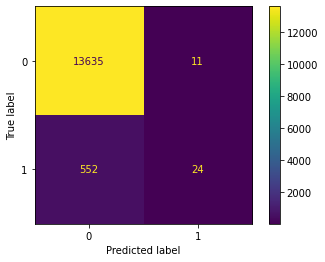

In [ ]:
#4)

#print out a confusion matrix based on the model from part 3
plot_confusion_matrix(logR2, X, y)



**4 continued:**

The confustion matrix allows us to visually measure and summarize the performance of our model in terms of how many true positives, true negatives, false positives, and false negatives our model predicted. From looking at the confusion matrix, we can see that our model is performing very well, generating substantially greater amounts of true possitives and true negatives than false outcomes. There are very few false negatives and false positives, which indicates that our model is accuratly predicting true/false events in most cases.

**PART 2: DATA EXPLORATION**

Prob of having a stroke if owns a dog and is over 50 years old:  0.08617290903970712
Prob of having a stroke if doesn't own a dog and currently smokes:  0.0387409200968523


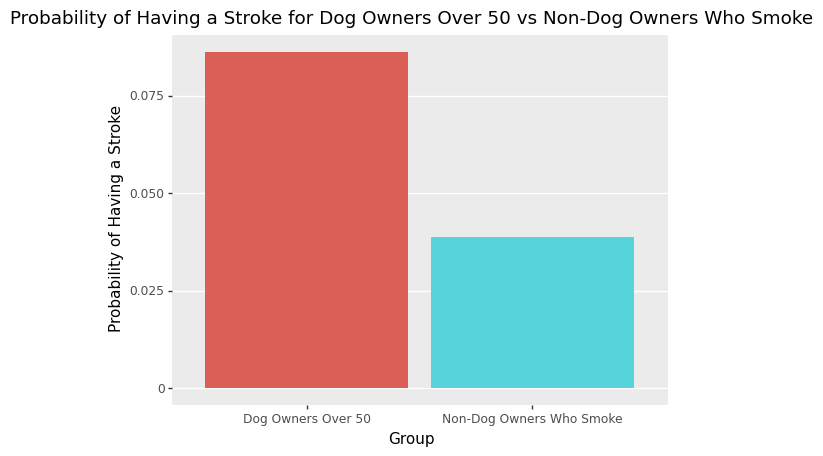

<ggplot: (8756785199141)>

In [ ]:
#1)

#store the people who own dogs and are over 50
owner_over50 = (strokes["dog_owner"] == 1) & (strokes["age"] > 50)
#obtain the number of people in this group
owner_over50_count = len(strokes[owner_over50])

#store the people who own dogs and are over 50 and have had a stroke
owner_over50_stroke = ((strokes["dog_owner"] == 1) & 
                       (strokes["age"] > 50) & (strokes["stroke"] == 1))
#obtain the number of people who are in this group
owner_over50_stroke_count = len(strokes[owner_over50_stroke])
#calculate the probability 
proba1 = owner_over50_stroke_count / owner_over50_count

#store the people who don't have a dog and currently smoke
notowner_smokes = (strokes["dog_owner"] == 0) & (strokes["smoking_status_smokes"] == 1)
#obtain the number of people in this group
notowner_smokes_count = len(strokes[notowner_smokes])
#store the people who don't own a dog and currently smoke and have had a stroke
notowner_smokes_stroke = ((strokes["dog_owner"] == 0) & 
                          (strokes["smoking_status_smokes"] == 1) & (strokes["stroke"] == 1))
#obtain the number of people who are in this group and have had a stroke
notowner_smokes_stroke_count = len(strokes[notowner_smokes_stroke])
#calculate the probability 
proba2 = notowner_smokes_stroke_count/ notowner_smokes_count

print("Prob of having a stroke if owns a dog and is over 50 years old: ", proba1)
print("Prob of having a stroke if doesn't own a dog and currently smokes: ", proba2)

#create data frame to store & graph probs
stroke_proba = [proba1, proba2]
df = pd.DataFrame({"Group": ["Dog Owners Over 50", "Non-Dog Owners Who Smoke"],
                   "Probability of Having a Stroke": stroke_proba})

#graph the probabilities
(ggplot(df, aes(x = "Group", y = "Probability of Having a Stroke", fill = "Group")) +
 geom_bar(stat = "identity") + 
 ggtitle("Probability of Having a Stroke for Dog Owners Over 50 vs Non-Dog Owners Who Smoke") +
 theme(panel_grid_minor_x = element_blank(),
       panel_grid_minor_y = element_blank(),
       panel_grid_major_x = element_blank(),
       legend_position = "none"))

**1 CONTINUED**

Dog owners who are over the age of 50 have a higher average probability of stroke than the group of people who are non-dog owners that currently smoke. We can tell this by looking at the bar graph above, which demonstrates that the probability of having a stroke if you are a dog owner over 50 is over 2x higher than if you are a non-dog owner who smokes. This information was found by computing the observed probability of having a stroke from each of these two groups. 

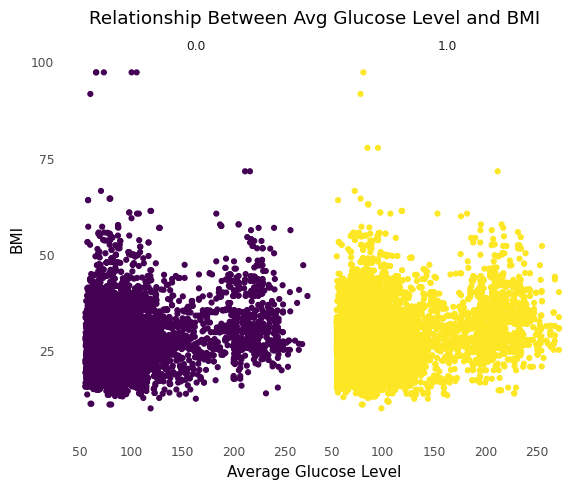

{<ggplot: (8756785257037)>}

In [ ]:
#2)

{(ggplot(strokes, aes(x = "avg_glucose_level", y = "bmi", color = "reg_to_vote"))) + 
 geom_point() + 
 theme_minimal() + 
 ggtitle ("Relationship Between Avg Glucose Level and BMI") + 
 labs(x = "Average Glucose Level", y = "BMI") + 
 theme(panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank(),
       panel_grid_minor_y = element_blank(),
       panel_grid_major_y = element_blank(),
       legend_position = "none") + 
 facet_wrap("~reg_to_vote")
}


**2 CONTINUED:**

While there is not an extreamly strong correlation between average glucose level and BMI, we can see a positive relationship between these two predictors. From looking at the scatter plots, we can see that an increase in average glucose level tends to relate to a higher BMI. 

Further, when comparing the relationship between average glucose level and BMI for people who are registered to vote vs aren't, it is apparent that whether or not someone was registered to vote has little impact on the relationship between BMI and average glucose levels. Looking at the two scatter plots, with the purple representing people who aren't registered to vote and the yellow people who are, we can see that the relationship between average glucose level and BMI is almost exactly the same for each. 


Less than 30k Accuracy:  1.0
Between 30k and 90k Accuracy:  0.9610494995942657
Over 90k accuracy:  0.9547339322736696


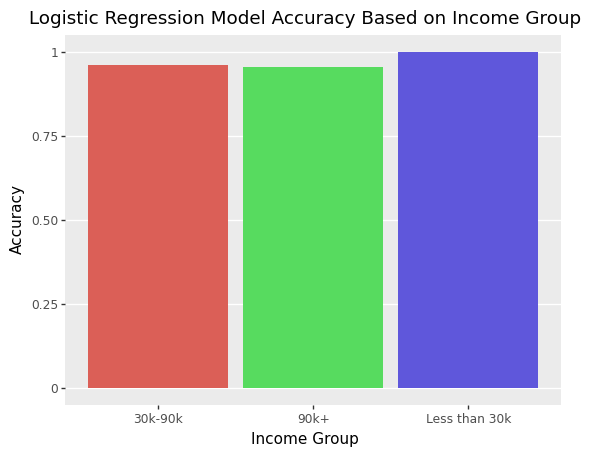

<ggplot: (8756785223121)>

In [ ]:
#3)

#seperate out the income groups from the strokes data frame
under30k = strokes["income_in_k"] < 30.000000
middle = (strokes["income_in_k"] >= 30.000000) & (strokes["income_in_k"] <= 90.000000)
over90k = strokes["income_in_k"] > 90.000000

#calculate the accuracy scores for each income group
under30k_acc = accuracy_score(y[under30k], logR2.predict(X[under30k]))
middle_acc = accuracy_score(y[middle], logR2.predict(X[middle]))
over90k_acc = accuracy_score(y[over90k], logR2.predict(X[over90k]))

print("Less than 30k Accuracy: ", under30k_acc)
print("Between 30k and 90k Accuracy: ", middle_acc)
print("Over 90k accuracy: ", over90k_acc)

accuracy = [under30k_acc, middle_acc, over90k_acc]

#create a new data frame to store the accuracy values for each group
df2 = pd.DataFrame({"Group": ["Less than 30k", "30k-90k", "90k+"],
                    "Accuracy": accuracy})

#graph the accuracy values
(ggplot(df2, aes(x = "Group", y = "Accuracy", fill = "Group")) +
 geom_bar(stat = "identity") + 
 ggtitle("Logistic Regression Model Accuracy Based on Income Group") +
 labs(x = "Income Group") + 
 theme(panel_grid_minor_x = element_blank(),
       panel_grid_minor_y = element_blank(),
       panel_grid_major_x = element_blank(),
       legend_position = "none"))


**3 CONTINUED**

My logistic regression model is most accurate for the income group under 30k and is least accurate for the income group over 90k. Using this model for all of the income groups in a real world scenario could cause serious accuracy and ethical issues to arise. Using this model on the 30-90k and 90k+ groups could lead to errors and ethical conflicts because the predictions are not guaranteed to be accurate. More investigation should be done into why this model is less accurate for these two income groups, as well as what can be done to develop a model that takes this information into consideration. 

When creating a model in an environment as serious as healthcare, such as for strokes, it is important to be sure that the model you are using is very accurate on every group. Using this model on the 90k+ and 30k-90k income groups would be very unethical because we are aware that it is not as accurate for this group. It is important we find a way to create a model that does not diminish accuracy for various income groups.

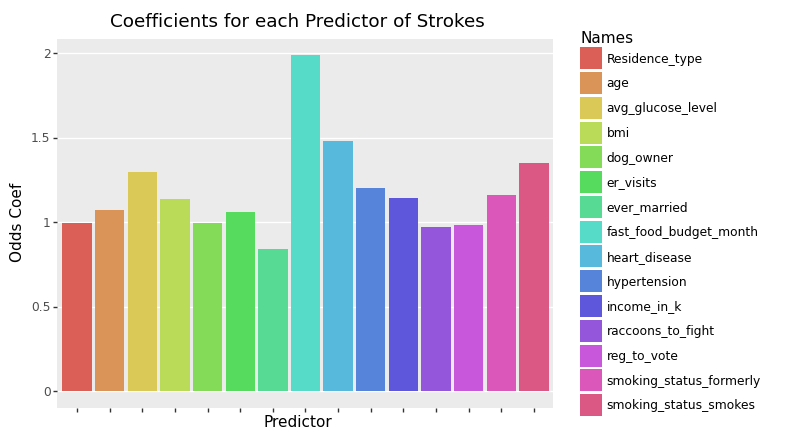

<ggplot: (8756785257025)>

In [ ]:
#4) 

#create dataframe coef that holds the coefficients of the predictors
coef = pd.DataFrame({"Coefs": logR.coef_[0],
                     "Names": predictors})

#convert to odds coefficients
coef["Odds Coef"] = np.exp(coef["Coefs"])


#create graph demonstrating relationship between predictor and having a stroke

(ggplot(coef, aes(x = "Names", y = "Odds Coef", fill = "Names")) +
 geom_bar(stat = "identity") + 
 ggtitle("Coefficients for each Predictor of Strokes") +
 labs(x = "Predictor", y = "Odds Coef") + 
 theme(panel_grid_minor_x = element_blank(),
       panel_grid_minor_y = element_blank(),
       panel_grid_major_x = element_blank(),
       axis_text_x = element_blank()))


**4 CONTINUED**

Residence type is thes strongest predictor of having a stroke out of the four variabes we were assessing. We can conclude this by observing the coefficients of the predictor values. Because the logistic regression model generates coefficients in terms of log odds, I first converted the coefficients to odds by exponentiating them. I was then able to look at the bar chart that displays each of the predictors coefficients in terms of odds to determine which coefficient was the strongest predictor. Because residence type has the highest odds coefficient, this means that it has the strongest impact on predicting if someone will have a stroke or not. 

# ER visits per year non-stroke patients:  0.7700354208476468
# ER visits per year stroke patients:  0.14571285474391976


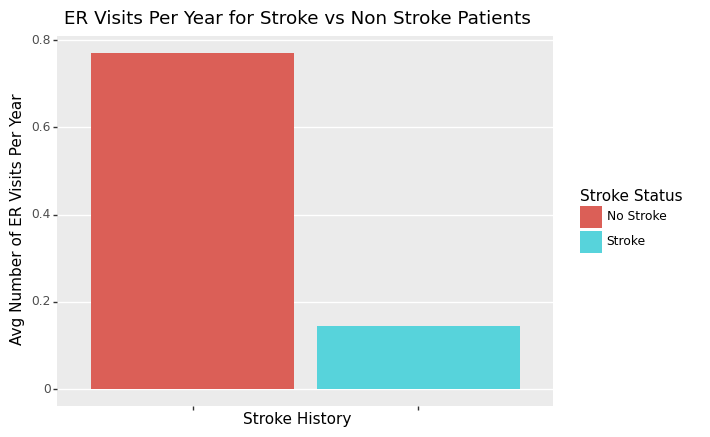

<ggplot: (8756785069269)>

In [ ]:
#5) 

#create new column in strokes df that holds er visits per year
strokes["er_visits_per_year"] = strokes["er_visits"] / strokes["age"]

#calculates the average er visits per year for non-stroke 
visitsPerYear_nonstroke = strokes.loc[strokes["stroke"] == 0]
count1 = visitsPerYear_nonstroke["er_visits_per_year"]
count_avg1 = np.mean(count1)

#calculates the average er visits per year for stroke
visitsPerYear_stroke = strokes.loc[strokes["stroke"] == 1]
count2 = visitsPerYear_stroke["er_visits_per_year"]
count_avg2 = np.mean(count2)

#create new data frame to hold the number of doctors visits
numVisitsDF = pd.DataFrame({"Num Visits": [count_avg1, count_avg2],
                            "Stroke Status": ["No Stroke", "Stroke"]})

print("# ER visits per year non-stroke patients: ", count_avg1)
print("# ER visits per year stroke patients: ", count_avg2)

#graph the results for the average number of ER visits per year for stroke vs non-stroke patients
(ggplot(numVisitsDF, aes(x = "Stroke Status", y = "Num Visits", fill = "Stroke Status")) +
 geom_bar(stat = "identity") + 
 ggtitle("ER Visits Per Year for Stroke vs Non Stroke Patients") +
 labs(x = "Stroke History", y = "Avg Number of ER Visits Per Year") + 
 theme(panel_grid_minor_x = element_blank(),
       panel_grid_minor_y = element_blank(),
       panel_grid_major_x = element_blank(),
       axis_text_x = element_blank()))


**5 CONTINUED**

Yes, the number of ER visits per year is different for stroke and non-stroke patients. The average number of ER visits per year is far higher for non-stroke patients, which we can see represented in the bar graph above. The average number of ER visits per year for non-stroke patients was 0.77, while the average number of ER visits per year for stroke patients was only 0.15. 